In [60]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [61]:
#Import dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from DatasetManager import DatasetManager
from datasets import Dataset
dataset_manager = DatasetManager()
dataset_manager.load_dataframe('main','../all-data.csv')
dataset_manager.create_dataset('unbalanced_dataset', '../data/financial_news_1.csv')
dataset_manager.create_dataset('balanced_dataset', '../data/financial_news_2.csv')


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

In [62]:
dataset_manager = DatasetManager()
dataset_manager.load_dataframe('main','../all-data.csv')


In [63]:
from gensim.models import KeyedVectors
data_path = '../data/GoogleNews-vectors-negative300.bin'

word2vec_model = KeyedVectors.load_word2vec_format(data_path, binary=True)


In [50]:
dataset01.save_dataset('fn01.csv')

In [64]:

dataset_manager.load_dataframe('unbalanced','../data/financial_news_1.csv')
dataset_manager.load_dataframe('balanced','../data/financial_news_2.csv')



In [65]:
dataset_manager.create_dataset('unbalanced_dataset', '../data/financial_news_1.csv')
dataset_manager.create_dataset('balanced_dataset', '../data/financial_news_2.csv')



  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

In [66]:
emb = dataset_manager['balanced'].get_embeddings(word2vec_model=word2vec_model)
split_dict = dataset_manager['balanced'].train_val_test_split(emb)


In [67]:
from ModelManager import ModelManager
model_manager = ModelManager() 

In [68]:
model_config_1 = {
    'model_name': 'LSTM_Model_1',
    'units': 32,
    'dropout_rate': 0.2,
    'return_sequences_config': False,
    'dense_units': 3,
    'activation': 'sigmoid',
    'output_activation': 'softmax',
    'optimizer': 'adam',
    'loss': 'categorical_crossentropy',
    'epochs': 30,
    'batch_size': 32,
}

model_config_2 = {
    'model_name': 'LSTM_Model_2',
    'units': 32,
    'dropout_rate': 0.2,
    'return_sequences_config': False,
    'dense_units': 3,
    'activation': 'sigmoid',
    'output_activation': 'softmax',
    'optimizer': 'adam',
    'loss': 'categorical_crossentropy',
    'epochs': 30,
    'batch_size': 10,
    'metrics': ['accuracy'],
}

model_manager.run_model_config(split_dict, model_config_1)
model_manager.run_model_config(split_dict, model_config_2)




Epoch 1/30
46/46 [==============================] - 1s 14ms/step - loss: 1.1299 - accuracy: 0.3409 - val_loss: 1.0981 - val_accuracy: 0.3352
Epoch 2/30
46/46 [==============================] - 0s 11ms/step - loss: 1.1126 - accuracy: 0.3520 - val_loss: 1.0989 - val_accuracy: 0.3022
Epoch 3/30
46/46 [==============================] - 0s 11ms/step - loss: 1.1097 - accuracy: 0.3499 - val_loss: 1.0990 - val_accuracy: 0.3022
Epoch 4/30
46/46 [==============================] - 0s 11ms/step - loss: 1.1123 - accuracy: 0.3368 - val_loss: 1.1013 - val_accuracy: 0.3022
Epoch 5/30
46/46 [==============================] - 0s 11ms/step - loss: 1.1099 - accuracy: 0.3230 - val_loss: 1.0991 - val_accuracy: 0.3022
Epoch 6/30
46/46 [==============================] - 1s 11ms/step - loss: 1.1138 - accuracy: 0.3375 - val_loss: 1.0987 - val_accuracy: 0.3352
Epoch 7/30
46/46 [==============================] - 0s 11ms/step - loss: 1.1020 - accuracy: 0.3409 - val_loss: 1.0994 - val_accuracy: 0.3352
Epoch 8/30
46

In [1]:
model_manager.plot_model_history('LSTM_Model_1')


NameError: name 'model_manager' is not defined

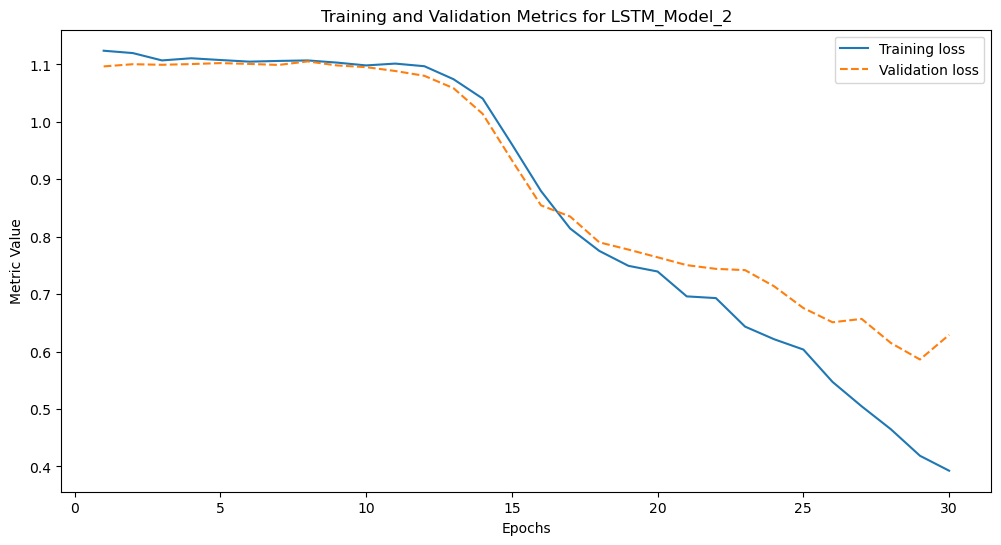

In [70]:
model_manager.plot_model_history('LSTM_Model_2')


In [77]:
y_pred_1 = model_manager.predict('LSTM_Model_2', split_dict['X_test'], return_class_indices=True)


6/6 [==============================] - 0s 7ms/step


In [78]:
model_manager.print_performance_metrics('LSTM_Model_2', split_dict['y_test'], y_pred_1, dataset_type='Imbalanced')


Accuracy Imbalanced data set for LSTM_Model_2: 0.73
F1 Score Imbalanced data set for LSTM_Model_2: 0.74


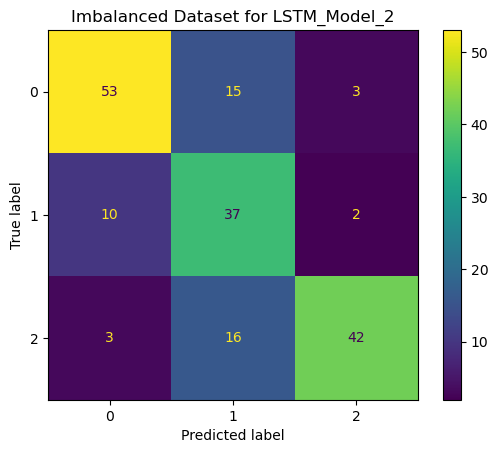

In [79]:
y_test_1_indices = split_dict['y_test'].argmax(axis=1)
model_manager.plot_confusion_matrix('LSTM_Model_2', y_test_1_indices, y_pred_1, title='Imbalanced Dataset')


In [19]:
#Import dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from DatasetManager import DatasetManager
from datasets import Dataset
dataset_manager = DatasetManager()
dataset_manager.load_dataframe('main','../all-data.csv')
dataset_manager.create_dataset('unbalanced_dataset', '../data/financial_news_1.csv')
dataset_manager.create_dataset('balanced_dataset', '../data/financial_news_2.csv')




  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

In [51]:
from DatasetProcesser import HFprocesser
hfp1 = HFprocesser(dataset_manager.get_dataset('unbalanced_dataset'))

x = hfp1.create_train_test_val_splits()
x

init


DatasetDict({
    train: Dataset({
        features: ['label', 'news'],
        num_rows: 3876
    })
    test: Dataset({
        features: ['label', 'news'],
        num_rows: 582
    })
    valid: Dataset({
        features: ['label', 'news'],
        num_rows: 388
    })
})

In [52]:

hfp1.tokenize_text_data()

hfp1.tokenized_text_data

DatasetDict({
    train: Dataset({
        features: ['label', 'news', 'input_ids', 'attention_mask'],
        num_rows: 3876
    })
    test: Dataset({
        features: ['label', 'news', 'input_ids', 'attention_mask'],
        num_rows: 582
    })
    valid: Dataset({
        features: ['label', 'news', 'input_ids', 'attention_mask'],
        num_rows: 388
    })
})


DatasetDict({
    train: Dataset({
        features: ['label', 'news', 'input_ids', 'attention_mask'],
        num_rows: 3876
    })
    test: Dataset({
        features: ['label', 'news', 'input_ids', 'attention_mask'],
        num_rows: 582
    })
    valid: Dataset({
        features: ['label', 'news', 'input_ids', 'attention_mask'],
        num_rows: 388
    })
})

In [6]:
#import bert model
#AutomodelForSequenceClassification will give us a model that already has some classification layers on top of distilbert
#Trainer is a class that help us train transformers, TrainingArguments is used to define training arguments in Trainer
from transformers import AutoModelForSequenceClassification, Trainer, TrainingArguments
import torch



c:\Users\Rober\Anaconda3\Lib\site-packages\transformers\utils\generic.py:260: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(


In [26]:
model_ckpt = "distilbert/distilbert-base-uncased"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") #Define device
model = AutoModelForSequenceClassification.from_pretrained(model_ckpt, num_labels = 3)
model_2 = (AutoModelForSequenceClassification.from_pretrained(model_ckpt, num_labels=3).to(device))


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert/distilbert-base-uncased and are newly initialized: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert/distilbert-base-uncased and are newly initialized: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [47]:
from HFManager import HFManager


hf1 = HFManager()

hf1.add_model('test')

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert/distilbert-base-uncased and are newly initialized: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [49]:
hf1.get_trainable_layers('test')


distilbert.embeddings.word_embeddings.weight True
distilbert.embeddings.position_embeddings.weight True
distilbert.embeddings.LayerNorm.weight True
distilbert.embeddings.LayerNorm.bias True
distilbert.transformer.layer.0.attention.q_lin.weight True
distilbert.transformer.layer.0.attention.q_lin.bias True
distilbert.transformer.layer.0.attention.k_lin.weight True
distilbert.transformer.layer.0.attention.k_lin.bias True
distilbert.transformer.layer.0.attention.v_lin.weight True
distilbert.transformer.layer.0.attention.v_lin.bias True
distilbert.transformer.layer.0.attention.out_lin.weight True
distilbert.transformer.layer.0.attention.out_lin.bias True
distilbert.transformer.layer.0.sa_layer_norm.weight True
distilbert.transformer.layer.0.sa_layer_norm.bias True
distilbert.transformer.layer.0.ffn.lin1.weight True
distilbert.transformer.layer.0.ffn.lin1.bias True
distilbert.transformer.layer.0.ffn.lin2.weight True
distilbert.transformer.layer.0.ffn.lin2.bias True
distilbert.transformer.lay

In [58]:
hf1.add_trainer('test',hfp1)

In [59]:
hf1.trainers['test'].train()

  0%|          | 0/1455 [00:00<?, ?it/s]

You're using a DistilBertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


KeyboardInterrupt: 

In [8]:
#Check trainable layers of the model
for name, param in model.named_parameters():
     print(name, param.requires_grad)

distilbert.embeddings.word_embeddings.weight True
distilbert.embeddings.position_embeddings.weight True
distilbert.embeddings.LayerNorm.weight True
distilbert.embeddings.LayerNorm.bias True
distilbert.transformer.layer.0.attention.q_lin.weight True
distilbert.transformer.layer.0.attention.q_lin.bias True
distilbert.transformer.layer.0.attention.k_lin.weight True
distilbert.transformer.layer.0.attention.k_lin.bias True
distilbert.transformer.layer.0.attention.v_lin.weight True
distilbert.transformer.layer.0.attention.v_lin.bias True
distilbert.transformer.layer.0.attention.out_lin.weight True
distilbert.transformer.layer.0.attention.out_lin.bias True
distilbert.transformer.layer.0.sa_layer_norm.weight True
distilbert.transformer.layer.0.sa_layer_norm.bias True
distilbert.transformer.layer.0.ffn.lin1.weight True
distilbert.transformer.layer.0.ffn.lin1.bias True
distilbert.transformer.layer.0.ffn.lin2.weight True
distilbert.transformer.layer.0.ffn.lin2.bias True
distilbert.transformer.lay

In [9]:
#Check again trainable and non trainable layers
#Check trainable layers of the model
for name, param in model.named_parameters():
     print(name, param.requires_grad)

distilbert.embeddings.word_embeddings.weight True
distilbert.embeddings.position_embeddings.weight True
distilbert.embeddings.LayerNorm.weight True
distilbert.embeddings.LayerNorm.bias True
distilbert.transformer.layer.0.attention.q_lin.weight True
distilbert.transformer.layer.0.attention.q_lin.bias True
distilbert.transformer.layer.0.attention.k_lin.weight True
distilbert.transformer.layer.0.attention.k_lin.bias True
distilbert.transformer.layer.0.attention.v_lin.weight True
distilbert.transformer.layer.0.attention.v_lin.bias True
distilbert.transformer.layer.0.attention.out_lin.weight True
distilbert.transformer.layer.0.attention.out_lin.bias True
distilbert.transformer.layer.0.sa_layer_norm.weight True
distilbert.transformer.layer.0.sa_layer_norm.bias True
distilbert.transformer.layer.0.ffn.lin1.weight True
distilbert.transformer.layer.0.ffn.lin1.bias True
distilbert.transformer.layer.0.ffn.lin2.weight True
distilbert.transformer.layer.0.ffn.lin2.bias True
distilbert.transformer.lay

In [27]:
#Compile model
training_args = TrainingArguments(output_dir='training_dir',
                                  evaluation_strategy='epoch',
                                  save_strategy='epoch',
                                  num_train_epochs=3,
                                  per_device_train_batch_size=16,
                                  per_device_eval_batch_size=64,
                                  )


In [28]:

#Define performance metrics
from sklearn.metrics import accuracy_score, f1_score
def score_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average="weighted")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1}

trainer_1 = Trainer(model,
                  training_args,
                  train_dataset = hf1.tokenized_text_data["train"],
                  eval_dataset = hf1.tokenized_text_data["valid"],
                  tokenizer=hf1.tokenizer,
                  compute_metrics=score_metrics)


In [ ]:

#Define performance metrics
from sklearn.metrics import accuracy_score, f1_score
def score_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average="weighted")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1}

trainer_1 = Trainer(model,
                  training_args,
                  train_dataset = tokenized_text_data["train"],
                  eval_dataset = tokenized_text_data["valid"],
                  tokenizer=tokenizer,
                  compute_metrics=score_metrics)


import time
start = time.time()
trainer_1.train()
end = time.time()
print("Training execution time ",end-start, 2)

In [29]:
import time
start = time.time()
trainer_1.train()
end = time.time()
print("Training execution time ",end-start, 2)

  0%|          | 0/729 [00:00<?, ?it/s]

You're using a DistilBertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


KeyboardInterrupt: 

In [ ]:
preds_output = trainer_4.predict(tokenized_split_2["test"])
preds_output.metrics #Check output metrics of evaluation
y_preds = np.argmax(preds_output.predictions, axis=1)


#Plot confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(tokenized_split_2['test']['label'], y_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
